# QUANTUM THEORY OF CONDENSED MATTER - Numerical Project
Prof. Luca Barbiero

## Exercise a)
Calculate the ground state energy $E_{gs}$ of the one-dimensional Bose-Hubbard model (eq. below) with $N$ bosons and $L=2N$ sites and demonstrate that $E_{gs}$ weakly depends on the chosen basis (max. number of bosons in a single site) when $U\gg J$.
$$ H = -J\sum_{i=0}^{L-1}(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)+\frac{U}{2}\sum_{i=0}^{L-1}n_i(n_i-1)$$

In [87]:
#import the necessary packages
from quspin.operators import hamiltonian
from quspin.basis import boson_basis_1d
import numpy as np

In [88]:
#we define model parameters
L = 6 # system size
J = 1.0 # hopping
U = 4 # interaction

In [89]:
#define boson basis with L/2 bosons in the lattice
basis = boson_basis_1d(L,Nb=L//2)# full boson basis

It is useful to rewrite the hamiltonian as:
$$H= -J\sum_{j=0}^{L-1}(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)-\frac{U}{2}\sum_{i=0}^{L-1} n_i + \frac{U}{2}\sum_{i=0}^{L-1}n_in_i $$

In [90]:
# define site-coupling lists
hop=[[-J,i,(i+1)%L] for i in range(L)] #PBC
interact=[[0.5*U,i,i] for i in range(L)] # U/2 \sum_j n_j n_j
pot=[[-0.5*U,i] for i in range(L)] # -U/2 \sum_j j_n

In [91]:
# define static and dynamic lists
static=[['+-',hop],['-+',hop],['n',pot],['nn',interact]]
dynamic=[]

In [92]:
# build Hamiltonian
H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)

Hermiticity check passed!
Particle conservation check passed!


In [93]:
# calculate eigensystem
#E,V=H.eigh()
E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10) # only GS
print("GS energy is %0.3f" %(E_GS[0]))

GS energy is -4.953


We now set values for $U$ and $J$ in order to have $U\gg J$, we set a larger number of bosons and iterate for different values of the `sps` parameter in `boson_basis_1d` in order to prove that the ground state energy weakly depends on the chosen basis.

In [94]:
L = 16
J = 1.0
U = 25

#site-coupling lists
hop=[[-J,i,(i+1)%L] for i in range(L)]
interact=[[0.5*U,i,i] for i in range(L)]
pot=[[-0.5*U,i] for i in range(L)]

#static and dynamic lists
static=[['+-',hop],['-+',hop],['n',pot],['nn',interact]]
dynamic=[]

#loop for the iteration
sps_array = [3, 4, 5, 6, 7, 8, 9] #remember that sps counts also the state with 0 bosons
Egs_array = []
for i in range(len(sps_array)):
    basis = boson_basis_1d(L,Nb=L//2, sps=sps_array[i])
    H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)
    E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10)
    print("sps = ", sps_array[i], "E_gs = ", E_GS[0])
    Egs_array.append(E_GS[0])

Hermiticity check passed!
Particle conservation check passed!
sps =  3 E_gs =  -10.855896484480718
Hermiticity check passed!
Particle conservation check passed!
sps =  4 E_gs =  -10.856104364837204
Hermiticity check passed!
Particle conservation check passed!
sps =  5 E_gs =  -10.856104365302759
Hermiticity check passed!
Particle conservation check passed!
sps =  6 E_gs =  -10.856104365302818
Hermiticity check passed!
Particle conservation check passed!
sps =  7 E_gs =  -10.856104365302855
Hermiticity check passed!
Particle conservation check passed!
sps =  8 E_gs =  -10.856104365302949
Hermiticity check passed!
Particle conservation check passed!
sps =  9 E_gs =  -10.856104365302764


The fact that $E_{gs}$ is little-to-no dependent on the parameter `sps` is already visible from the printed values, to make it even more evident we can fit the results to a linear relation $y=a+bx$ (where $y$ is the ground state energy and $x$ is the max number of bosons in a single site) and check that the parameter $b$ is null.

In [95]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [96]:
def linear(x,a,b):
    y = a+b*x
    return y

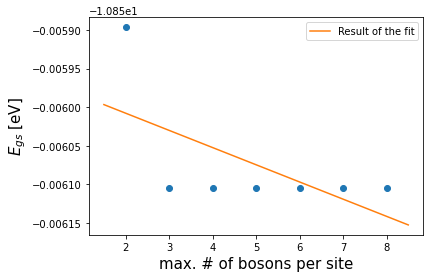

In [97]:
max_occ_array = []

for i in range(len(sps_array)):
    max_occ_array.append(sps_array[i]-1)
parameters, covariance = curve_fit(linear, max_occ_array, Egs_array)

a = parameters[0]
b = parameters[1]
par_errors=np.sqrt(np.diag(covariance))
erra=par_errors[0]
errb=par_errors[1]

x_fit=np.linspace(1.5, 8.5, 60)
y_fit=[]
for i in range(len(x_fit)):
    y_fit.append(linear(x_fit[i], a, b))
plt.plot(max_occ_array, Egs_array, 'o')
plt.plot(x_fit, y_fit, label="Result of the fit")

plt.xlabel("max. # of bosons per site", fontsize = 15)
plt.ylabel(r'$E_{gs}$ [eV]', fontsize = 15)

plt.legend()

We do a Z-test to check that $b$ is compatible with 0:

In [98]:
import scipy.stats

z=b/a
print("Z =", z)
p=scipy.stats.norm.sf(abs(z))*2
print("p-value =", p)

Z = 2.0516816470906425e-06
p-value = 0.9999983629948901


We conclude that in the regime $U\gg J$ the ground state energy of of the one-dimensional Bose-Hubbard model $E_gs$ is independent of the chosen basis.